In [10]:
from qiskit import QuantumCircuit, QuantumRegister
import os, sys
import numpy
import random
from tqdm import tqdm
import rustworkx
import json
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector, partial_trace

if not '../' in sys.path:
    sys.path.insert(1, '../')

In [11]:
from helperfunctions.circuitgraphfunctions import get_computation_graph, get_uncomp_circuit
from helperfunctions.uncompfunctions import add_uncomputation, exhaustive_uncomputation_adding, greedy_uncomputation_full, greedy_uncomputation_partial
from helperfunctions.graphhelper import edge_attr, edge_matcher,node_attr,node_matcher, breakdown_qubit
from helperfunctions.measurecircuit import get_statevector, get_probability_from_statevector, zero_ancillas_in_statevector
from helperfunctions.constants import UncompType
from helperfunctions.randomcircuit import random_quantum_circuit_large_with_params, breakdown_qubit

from rustworkx.visualization import graphviz_draw

In [ ]:
def qubit_shifting_circuit_no_uncomp():
    circuit = QuantumCircuit(QuantumRegister(3,'cq'), QuantumRegister(3,'aq'))
    for i in range(3):
        circuit.h(i)
        circuit.cx(i,i+3)
    for i in range(3):
        circuit.cx(i+3,i)

    circuit.cx(3,1)
    circuit.cx(4,2)
    circuit.cx(5,0)

    return circuit, 3,3,9
    
def qubit_shifting_circuit_with_some_uncomp():
    circuit = QuantumCircuit(QuantumRegister(3,'cq'), QuantumRegister(3,'aq'))
    for i in range(3):
        circuit.h(i)
        circuit.cx(i,i+3)
    # for i in range(3):
    #     circuit.cx(i+3,i)

    circuit.cx(3,1)
    circuit.cx(4,2)
    circuit.cx(5,0)

    circuit.cx(1,0)
    circuit.cx(2,1)
    circuit.cx(5,2)
    
    return circuit, 3,3,9
    
        

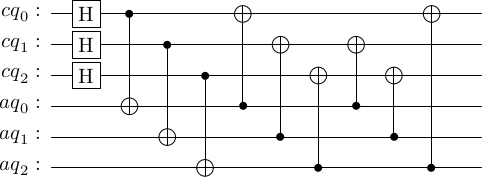

In [16]:
circ, q,a,g = qubit_shifting_circuit_no_uncomp()
circ.draw('latex')

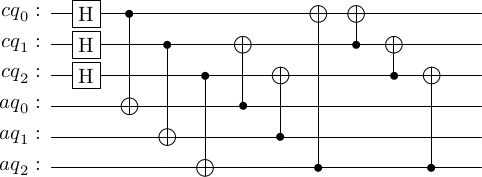

In [17]:
circ, q,a,g = qubit_shifting_circuit_with_some_uncomp()
circ.draw('latex')